#**Pengenalan Tokenisasi dan Sequences**

Mengembangkan model untuk masalah computer vision relatif lebih mudah karena nilai-nilai piksel pada gambar sudah dalam format bilangan numerik yang dapat diolah model.

Salah satu cara yang dapat dilakukan adalah mengonversi setiap huruf pada sebuah kata ke dalam bilangan tertentu misalnya ke dalam format ASCII seperti di bawah.

Salah satu cara yang dapat dilakukan adalah mengonversi setiap huruf pada sebuah kata ke dalam bilangan tertentu misalnya ke dalam format ASCII seperti di bawah.

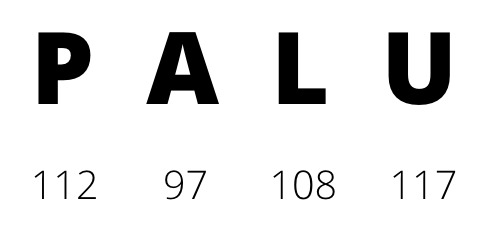

Namun teknik ini memiliki masalah tersendiri karena, 2 buah kata berbeda dapat terdiri dari huruf-huruf yang sama seperti “Palu” dan “Lupa”. Walaupun 2 kata tersebut memiliki huruf-huruf yang sama, namun artinya sangat berbeda. Hal yang lebih baik dilakukan dibanding mengkonversi setiap huruf dalam kata, adalah dengan mengonversi setiap kata dalam sebuah kalimat ke bilangan tertentu. Dengan begini Setiap kata yang memiliki arti berbeda, akan diperlakukan berbeda oleh model. Seperti kata lupa dan palu.

Proses mengonversi kata-kata ke dalam bilangan numerik dapat kita sebut juga sebagai tokenisasi. Setelah melakukan tokenisasi pada teks, hal selanjutnya adalah mengubah setiap kalimat dalam teks kita ke dalam sequence. Sebuah sekuens adalah sebuah larik yang berisi kumpulan token sesuai dengan setiap kata pada sebuah kalimat dalam teks.

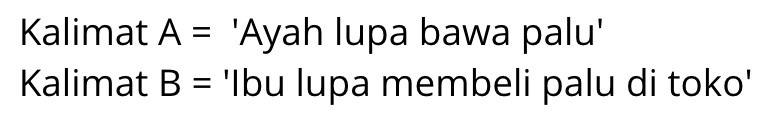

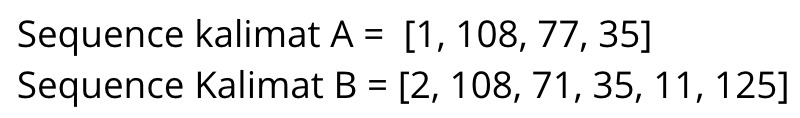

Dari contoh di atas dapat dilihat jika panjang kedua sequence tersebut tidak sama. Ingat pada kasus klasifikasi gambar bahwa, ukuran gambar yang berbeda harus diproses dahulu hingga ukurannya seragam agar bisa diproses oleh model ML. Begitu juga dengan teks. Setelah setiap kalimat pada teks dikonversi menjadi sequence, kita harus memastikan agar setiap sequence sama panjang agar bisa dilatih pada model.

Proses untuk mengubah setiap sequence agar memiliki panjang yang sama adalah padding. Pada padding, setiap sequence dibuat sama panjang dengan menambahkan nilai 0 secara sufiks atau prefiks hingga mencapai panjang maksimum sequence. Selain itu padding juga dapat memotong sequence hingga panjangnya sesuai dengan panjang maksimum sequence.


#**Latihan Tokenization**

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

Kemudian buat objek tokenizer dengan memanggil fungsi tokenizer dan melengkapi parameternya. Parameter num_words adalah jumlah kata yang akan dikonversi ke dalam token/bilangan numerik. Jika parameter num_words diatur sebanyak 15, hanya 15 kata yang paling sering muncul. 15 kata tersebut akan ditokenisasi dari seluruh kata pada dataset.

Sedangkan parameter oov_token adalah parameter yang berfungsi untuk mengganti kata-kata yang tidak ditokenisasi menjadi karakter tertentu. Pada praktiknya, lebih baik untuk mengganti kata yang tidak dikenali dengan suatu kata tertentu dibanding melewatkan kata tersebut untuk mengurangi informasi yang hilang. Hal inilah yang dapat dilakukan dengan menambahkan parameter OOV.

In [12]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

Lalu, buat teks yang akan kita tokenisasi dan kita pakai untuk pelatihan model.

In [13]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

Untuk melakukan tokenisasi, panggil fungsi fit_on_text() pada objek tokenizer dan isi teks kita sebagai argumennya.

In [14]:
tokenizer.fit_on_texts(teks)

Kemudian, kita akan mengubah text yang telah dibuat sebelumnya ke dalam bentuk sequence menggunakan fungsi text_to_sequences.

In [15]:
sequences = tokenizer.texts_to_sequences(teks)

Untuk melihat hasil tokenisasi, kita bisa memanggil atribut word_index dari objek tokenizer. Atribut word index mengembalikan dictionary berupa kata sebagai key dan token atau nilai numeriknya sebagai value. Perlu diperhatikan bahwa tanda baca dan huruf kapital tidak diproses oleh tokenizer. Contohnya kata “Selamat!” dan “SELAMAT” akan diperlakukan sebagai kata yang sama. Hasil dari cell di bawah menunjukkan bahwa kata-kata yang out-of-vocabulary akan diberi token bernilai 1.

In [18]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


Berikutnya, perhatikan kode di bawah ini. Output kode di bawah merupakan contoh penggunaan token untuk mengubah kalimat ke dalam bentuk numerik. Pada contoh tersebut, kata ‘belajar’, ‘sejak’, dan ‘SMP’ ditandai dengan nilai "1". Hal ini menunjukkan bahwa kata-kata tersebut tidak terdapat pada dictionary yang sebelumnya telah dibuat (OOV). Tanpa OOV, kata yang tidak memiliki token tidak dimasukkan pada sequence. Jika kita menggunakan OOV, maka setiap kata yang tidak memiliki token akan diberikan token yang seragam. Dengan OOV, informasi urutan setiap kata pada kalimat tidak hilang.

In [20]:
print(tokenizer.texts_to_sequences('Saya suka programming'))
print(tokenizer.texts_to_sequences('Saya suka belajar programming sejak SMP'))

[[1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
[[1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [1], [1], [1]]


Setelah tokenisasi, untuk mengubah kalimat ke dalam nilai-nilai yang sesuai dapat dengan menggunakan fungsi text_to_sequence() dan masukkan parameter dari teks kita. Ketika sequence telah dibuat, hal yang perlu kita lakukan adalah padding. Yup, padding adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar.

Untuk menggunakan padding, kita perlu memanggil library pad_sequence terlebih dahulu. Kemudian, panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

Setelah melakukan padding, setiap sequence akan memiliki panjang yang sama. Padding dapat melakukan ini dengan menambahkan 0 secara default pada awal sequence yang lebih pendek



In [22]:
sequences_samapanjang

array([[ 0,  0,  0,  3,  4,  2],
       [ 0,  0,  0,  2,  5,  6],
       [ 7,  8,  9, 10, 11, 12]], dtype=int32)

Jika kita ingin merubah sehingga 0 ditambahkan di akhir sequence, kita dapat menggunakan parameter padding dengan nilai ‘post’. Selain itu kita dapat mengatur parameter maxlen (panjang maksimum setiap sequence) dengan nilai yang kita inginkan. Jika kita mengisi nilai 5, maka panjang sebuah sequence tidak akan melebihi 5.

In [23]:
sequences_samapanjang = pad_sequences(sequences,
                                      padding='post',
                                      maxlen=5)

Jika teks kita memiliki panjang lebih dari nilai parameter maxlen misalnya 5, maka secara default nilai dari sequence akan diambil 5 nilai terakhir atau 5 kata terakhir saja dari setiap kalimat (mengabaikan kata sebelumnya). Untuk mengubah pengaturan ini dan mengambil 5 kata awal dari tiap kalimat, kita dapat menggunakan parameter truncating dan mengisi nilai ‘post’.

In [24]:
sequences_samapanjang = pad_sequences(sequences,
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

#**Embedding**

Pada klasifikasi teks, kita perlu melakukan embedding yang merupakan kunci dalam klasifikasi teks di Tensorflow. Embedding memungkinkan model ML untuk memahami makna di setiap kata dan mengelompokkan kata-kata dengan makna yang mirip agar berdekatan. Misalnya komentar pada sebuah video youtube, di mana kata-kata “menarik”, “keren”, dan “luar biasa” akan dikelompokkan berdekatan. Pengelompokkan ini dapat dicapai dengan memetakan setiap kata ke dalam vektor atau larik. Di mana kata yang mirip akan memiliki nilai vektor yang mirip.

Makna dari sebuah kata didapat dari label dari data tersebut. Misalnya pada teks yang berlabel negatif terdapat banyak kata ‘membosankan’, dan ‘jelek’. Maka kedua kata tersebut memiliki makna yang mirip sehingga nilai vektor mereka mirip. Informasi lebih detail mengenai Embedding dapat Anda lihat pada tautan berikut

Untuk mengimplementasikan Embedding pada Keras juga sangatlah mudah. Pada model sequential, kita tinggal memanggil fungsi Embedding() dan mengisi parameter total kata yang di tokenisasi, panjang kalimat, serta dimensi embedding yang diinginkan. Karena hasil dari embedding merupakan larik 2 dimensi yang berisi panjang setiap kalimat, dan dimensi embedding, maka kita memerlukan fungsi flatten().

In [29]:
# model = tf.keras.models.Sequential([
#    tf.keras.layers.Embedding(jumlah_kata, dimensi_embedding, panjang_input),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(24, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
# ])

Setelah mengimplementasikan Embedding pada model sekuensial kita, panggil fungsi compile. Untuk optimizer, kita dapat menggunakan optimizer yang telah kita pelajari sebelumnya. Sedangkan loss disesuaikan dengan kelas yang terdapat pada dataset.

Setelah mengimplementasikan Embedding pada model sekuensial kita, panggil fungsi compile. Untuk optimizer, kita dapat menggunakan optimizer yang telah kita pelajari sebelumnya. Sedangkan loss disesuaikan dengan kelas yang terdapat pada dataset.

In [31]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

Untuk fungsi fit, kita memerlukan parameter teks yang telah di-padding, label dari data training, jumlah epoch, serta data validasi. Mudah bukan.

In [33]:
# model.fit(padded_latih, label_latih,
#           epochs=num_epochs,
#           validation_data=(padded_test, label_test))

#**Binary Text Classification**

Untuk latihan kali ini kita akan menggunakan dataset Yelp yang berisi review dari beberapa restoran di Amerika Serikat. Dataset terdiri dari 2 kelas yaitu 0 dan 1 yang menunjukkan apakah review tersebut positif atau negatif. Dataset dapat diunduh pada tautan ini yah.

Setelah dataset diunduh, kita load dataset pada Colaboratory. Dan pastinya kita buat dataframe dari dataset kita agar lebih mudah diproses.
https://www.kaggle.com/datasets/marklvl/sentiment-labelled-sentences-data-set

In [35]:
from google.colab import files

uploaded = files.upload()

Saving sentiment_labelled.zip to sentiment_labelled.zip


In [49]:
# import zipfile
# import io

# # Nama file zip yang diunggah
# zip_file_name = "sentiment_labelled.zip"

# # Ekstrak file zip
# with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
#     # Ekstrak semua isi folder 'sentiment labelled sentences'
#     zip_ref.extractall("sentiment_labelled_sentences")

In [50]:
# import os

# # List file dan direktori
# os.listdir('C:/Users/hp/Downloads')

In [51]:
import pandas as pd


# Baca file 'yelp_labelled.txt' dari folder yang baru diekstrak
df = pd.read_csv('yelp_labelled.csv', names=['sentence', 'label'], sep='\t')
df

,sentence,label
0,"Wow... Loved this place.,1,,,,",NaN
1,"Crust is not good.,0,,,,",NaN
2,"Not tasty and the texture was just nasty.,0,,,,",NaN
3,Stopped by during the late May bank holiday of...,NaN
4,The selection on the menu was great and so wer...,NaN
...,...,...
995,I think food should have flavor and texture an...,NaN
996,"Appetite instantly gone.,0,,,,",NaN
997,Overall I was not impressed and would not go b...,NaN
998,"The whole experience was underwhelming, and I ...",NaN


Untuk melihat 5 sampel terakhir dari dataset kita, panggil fungsi tail().

In [52]:
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,NaN
996,"Appetite instantly gone.,0,,,,",NaN
997,Overall I was not impressed and would not go b...,NaN
998,"The whole experience was underwhelming, and I ...",NaN
999,"Then, as if I hadn't wasted enough of my life ...",NaN


Setelah itu kita bagi dataset menjadi train dan test set.

In [53]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

Agar teks dapat dipahami oleh model, kita harus lakukan tokenisasi. Gunakan fungsi tokenizer pada data latih dan data test. Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)
tokenizer.fit_on_texts(kalimat_test)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=20)
padded_test = pad_sequences(sekuens_test, maxlen=20)

Untuk arsitektur yang akan digunakan adalah layer embedding, dengan argumen pertama sesuai dengan jumlah vocabulary/kata yang kita pakai pada tokenizer. Argumen selanjutnya adalah dimensi embedding, dan input_length yang merupakan panjang dari sequence. Nah di kita tidak menggunakan layer Flatten melainkan kita menggantinya dengan GlobalAveragePooling1D. Fungsi ini bekerja lebih baik pada kasus NLP dibanding Flatten.

In [55]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Setelah arsitektur model dibentuk, dan loss function serta optimizer ditentukan, kita dapat memulai pelatihan model kita. Di sini penulis menggunakan 30 epoch. Anda bebas bereksperimen dengan nilai yang lain.

In [56]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs,
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 1s - loss: nan - accuracy: 0.0025 - val_loss: nan - val_accuracy: 0.0000e+00 - 1s/epoch - 42ms/step
Epoch 2/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 79ms/epoch - 3ms/step
Epoch 3/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 85ms/epoch - 3ms/step
Epoch 4/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 80ms/epoch - 3ms/step
Epoch 5/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 83ms/epoch - 3ms/step
Epoch 6/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 84ms/epoch - 3ms/step
Epoch 7/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 63ms/epoch - 3ms/step
Epoch 8/30
25/25 - 0s - loss: nan - accuracy: 0.0050 - val_loss: nan - val_accuracy: 0.0000e+00 - 72ms/epoch - 3ms/step
Epoch 9/30
25/25 - 0s - loss: nan - accur

#**Long Short-Term Memory (LSTM) Layer**

Namun pada klasifikasi teks, kita tidak dapat hanya memahami sebuah kalimat berdasarkan kata-kata saja. Misalnya kalimat “Saya suka programming”, dan “Saya tidak suka programming”, sama-sama memiliki kata suka di dalamnya namun, makna kedua kalimat tersebut berlawanan. Jadi urutan kata-kata juga sangat berpengaruh dalam arti sebuah kalimat. Nah di submodul ini kita akan belajar teknik baru yaitu LSTM untuk mengatasi masalah sebelumnya.

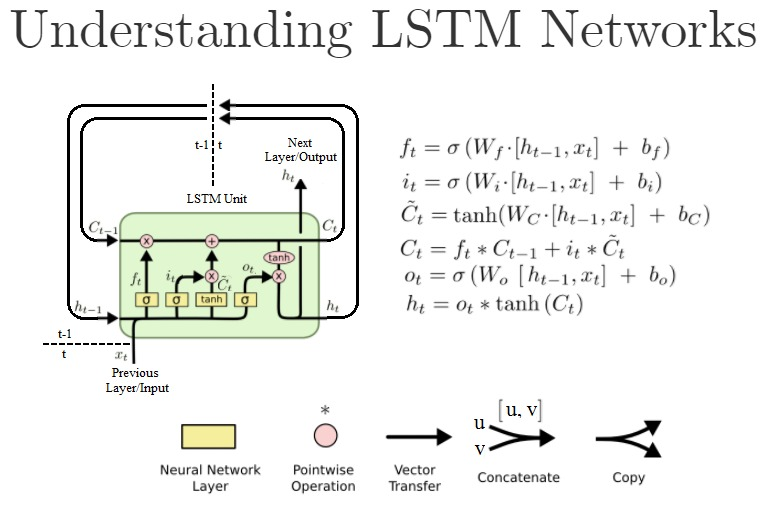

Teori di balik LSTM sangatlah rumit seperti di atas. Namun kita akan menggunakan contoh sederhana yang mudah Anda pahami. Bayangkan kalimat berikut.

“Di Indonesia, salah satu olahan nasi paling populer adalah nasi...”

Anda kemungkinan akan menjawab nasi goreng. Kenapa Anda menjawab seperti itu? Karena adanya petunjuk pada kata Indonesia dan populer. Dapat kita lihat bahwa konteks dari sebuah kata, dipengaruhi oleh kata-kata yang mendahuluinya. Jaringan saraf dapat melakukan hal ini dengan menggunakan LSTM. Long Short-Term Memory (LSTM) adalah teknik yang umum digunakan dalam pemrosesan bahasa alami yang memungkinkan agar model dapat memahami makna sebuah kalimat berdasarkan urutan kata, seperti pada contoh nasi goreng kita.

Untuk mengimplementasikan LSTM sendiri sangatlah mudah pada Keras. Kita cukup menambahkan layer LSTM dan mengisi parameter dengan jumlah output yang diinginkan dari layer tersebut. Contoh penggunaan LSTM dapat dilihat pada kode di bawah. Kita dapat meletakkan layer LSTM setelah layer embedding dan sebelum Dense layer.

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

#**Multiclass Text Classification**

Pada latihan ini kita akan menggunakan dataset yang berisi sinopsis dari beberapa film Indonesia dan genrenya. Tujuan kita adalah menentukan genre sebuah film berdasarkan sinopsisnya. Dataset dapat Anda unduh pada tautan berikut.

Pada cell pertama impor library pandas dan ubah dataset menjadi dataframe. Kemudian buang kolom 'judul_film' karena kita hanya akan menggunakan sinopsis sebagai atribut untuk dilatih pada model.

In [58]:
uploaded = files.upload()

Saving indonesian_movies.zip to indonesian_movies.zip


In [59]:
import zipfile
import io

# Ganti 'nama_file.zip' dengan nama file zip yang diunggah
with zipfile.ZipFile('indonesian_movies.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/hp/Downloads')

In [60]:
import os

os.listdir('C:/Users/hp/Downloads')

['sentiment labelled sentences', 'imdb_indonesian_movies_2.csv']

In [63]:
import pandas as pd
df = pd.read_csv('C:/Users/hp/Downloads/imdb_indonesian_movies_2.csv')
df

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama
...,...,...,...
1000,Winter in Tokyo,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis
1001,Petualang Cinta,Markonah melarikan diri ke Jakarta karena akan...,Romantis
1002,Last Night (III),"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis
1003,Path of Light,Proyek baru ini adalah tentang seorang lelaki ...,Romantis


In [64]:
df = df.drop(columns=['judul_film'])

Karena label kita berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [65]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [66]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

Lalu, bagi data untuk training dan data untuk testing.

In [67]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

Untuk arsitektur model kita menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer. Jangan lupa panggil fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

In [69]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [71]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/10
26/26 - 16s - loss: 0.0610 - accuracy: 0.9851 - val_loss: 4.3019 - val_accuracy: 0.3035 - 16s/epoch - 609ms/step
Epoch 2/10
26/26 - 16s - loss: 0.0476 - accuracy: 0.9838 - val_loss: 4.5238 - val_accuracy: 0.2786 - 16s/epoch - 614ms/step
Epoch 3/10
26/26 - 16s - loss: 0.0390 - accuracy: 0.9925 - val_loss: 4.2744 - val_accuracy: 0.2935 - 16s/epoch - 603ms/step
Epoch 4/10
26/26 - 16s - loss: 0.0166 - accuracy: 0.9963 - val_loss: 5.1204 - val_accuracy: 0.2935 - 16s/epoch - 609ms/step
Epoch 5/10
26/26 - 16s - loss: 0.0148 - accuracy: 0.9975 - val_loss: 5.1956 - val_accuracy: 0.2836 - 16s/epoch - 611ms/step
Epoch 6/10
26/26 - 16s - loss: 0.0104 - accuracy: 0.9975 - val_loss: 5.2516 - val_accuracy: 0.2736 - 16s/epoch - 597ms/step
Epoch 7/10
26/26 - 17s - loss: 0.0077 - accuracy: 0.9988 - val_loss: 5.7366 - val_accuracy: 0.2935 - 17s/epoch - 637ms/step
Epoch 8/10
26/26 - 16s - loss: 0.0084 - accuracy: 0.9975 - val_loss: 5.8248 - val_accuracy: 0.2886 - 16s/epoch - 613ms/step
Epoch 9/

Akurasi dari model kita menunjukkan terjadinya overfitting karena akurasi pada data training sangat besar, sedangkan akurasi pada data validasi jauh lebih kecil. Hal ini masih sangat luar biasa karena kita hanya memiliki 1000 buah sampel data.